# Loan Prediction Project
Complete end-to-end machine learning project to predict loan status.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
df = pd.read_csv("C:\\Users\\lenovo\\Documents\\Loan_Prediction_Dataset.csv")
df.head()

In [ ]:
# Data Exploration
df.info()
df.describe()
df.isnull().sum()

In [6]:
# Data Preprocessing

# Fill categorical with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical with median
for col in ['LoanAmount', 'Loan_Amount_Term']:
    df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing target
df.dropna(subset=['Loan_Status'], inplace=True)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

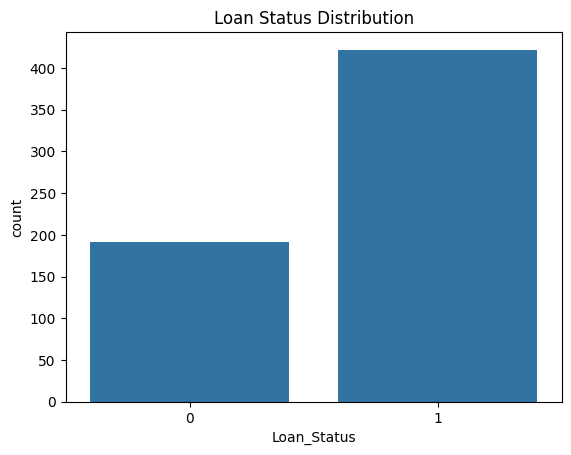

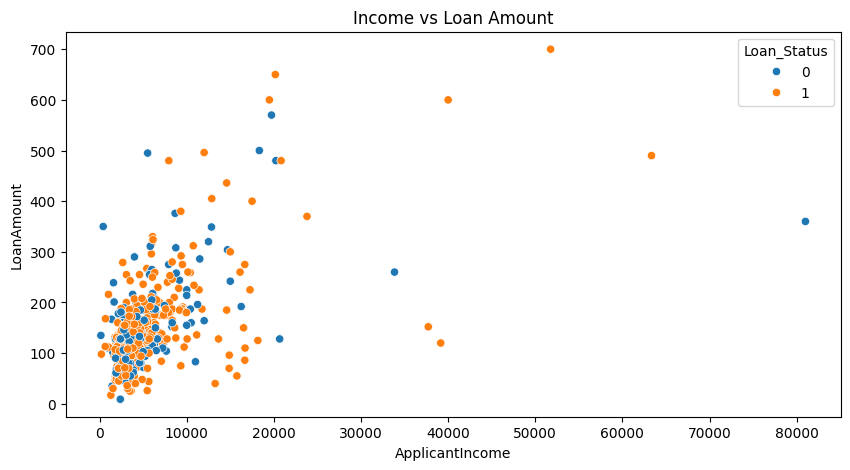

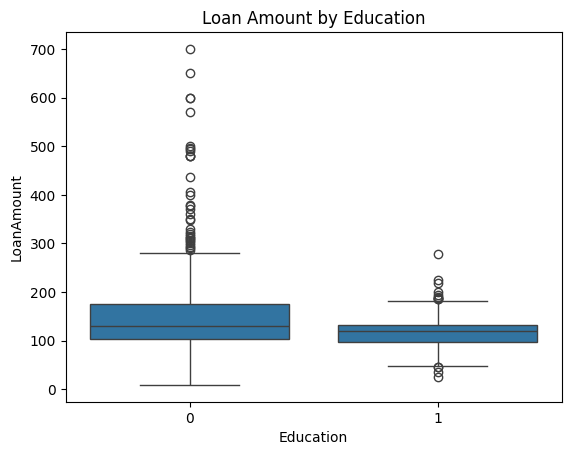

In [22]:
# Visualizations
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Income vs Loan Amount')
plt.show()

sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education')
plt.show()

In [10]:
# Train-Test Split
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Evaluate Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7560975609756098

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



In [13]:
# Prediction with User Input
def predict_loan_status():
    print("Enter the following details to check loan approval possibility:")

    Gender = input("Gender (Male/Female): ")
    Married = input("Married (Yes/No): ")
    Dependents = input("Dependents (0/1/2/3+): ")
    Education = input("Education (Graduate/Not Graduate): ")
    Self_Employed = input("Self Employed (Yes/No): ")
    ApplicantIncome = int(input("Applicant Income: "))
    CoapplicantIncome = float(input("Coapplicant Income: "))
    LoanAmount = float(input("Loan Amount: "))
    Loan_Amount_Term = float(input("Loan Amount Term (in days): "))
    Credit_History = float(input("Credit History (0/1): "))
    Property_Area = input("Property Area (Urban/Semiurban/Rural): ")

    input_data = pd.DataFrame({
        'Gender': [1 if Gender.lower() == 'male' else 0],
        'Married': [1 if Married.lower() == 'yes' else 0],
        'Dependents': [0 if Dependents == '0' else 1 if Dependents == '1' else 2 if Dependents == '2' else 3],
        'Education': [0 if Education.lower() == 'graduate' else 1],
        'Self_Employed': [1 if Self_Employed.lower() == 'yes' else 0],
        'ApplicantIncome': [ApplicantIncome],
        'CoapplicantIncome': [CoapplicantIncome],
        'LoanAmount': [LoanAmount],
        'Loan_Amount_Term': [Loan_Amount_Term],
        'Credit_History': [Credit_History],
        'Property_Area': [0 if Property_Area.lower() == 'urban' else 1 if Property_Area.lower() == 'semiurban' else 2]
    })

    prediction = model.predict(input_data)[0]
    result = 'Loan will likely be APPROVED' if prediction == 1 else 'Loan will likely be REJECTED'
    print("\n🧾 Prediction:", result)

In [21]:
predict_loan_status()

Enter the following details to check loan approval possibility:


Gender (Male/Female):  Male
Married (Yes/No):  Yes
Dependents (0/1/2/3+):  5
Education (Graduate/Not Graduate):  Not Graduate
Self Employed (Yes/No):  Yess
Applicant Income:  100000
Coapplicant Income:  200000
Loan Amount:  1000000
Loan Amount Term (in days):  365
Credit History (0/1):  1
Property Area (Urban/Semiurban/Rural):  Urban



🧾 Prediction: Loan will likely be REJECTED
